In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.metrics import classification_report


In [60]:
results_anomal = {}
results_total = {}
dataset = ['0.049_noise.csv','0.099_noise.csv', '0.125_noise.csv']
threshold = ['fixed', 'celoss', 'classifier']
for d in dataset:
    for thr in threshold:
        config = '%s_%s'%(d[:5], thr)
        results_anomal[config] = []
        results_total[config] = []
        df = pd.read_csv('./%s_%s.csv'%(d, thr))
        if 'pred_ad_anom' in df.columns.values:
            df = df.rename(columns={'pred_ad_anom':'pred_noise'})
        prefixes = df.groupby('prefix')
        for p, group in prefixes:
            if p <18:
                y_true = group['true_noise']
                y_pred = group['pred_noise']
                cls_report = classification_report(y_true, y_pred, output_dict=True)
                # print(classification_report(y_true, y_pred))
                results_anomal[config].append(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                results_total[config].append(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
                # print(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                # print(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
        print('----------')

0.049_noise.csv fixed 2
0.049_noise.csv fixed 3
0.049_noise.csv fixed 4
0.049_noise.csv fixed 5
0.049_noise.csv fixed 6
0.049_noise.csv fixed 7
0.049_noise.csv fixed 8
0.049_noise.csv fixed 9
0.049_noise.csv fixed 10
0.049_noise.csv fixed 11
0.049_noise.csv fixed 12
0.049_noise.csv fixed 13
0.049_noise.csv fixed 14
0.049_noise.csv fixed 15
0.049_noise.csv fixed 16
0.049_noise.csv fixed 17
----------
0.049_noise.csv celoss 2
0.049_noise.csv celoss 3
0.049_noise.csv celoss 4
0.049_noise.csv celoss 5
0.049_noise.csv celoss 6
0.049_noise.csv celoss 7
0.049_noise.csv celoss 8
0.049_noise.csv celoss 9
0.049_noise.csv celoss 10
0.049_noise.csv celoss 11
0.049_noise.csv celoss 12
0.049_noise.csv celoss 13
0.049_noise.csv celoss 14
0.049_noise.csv celoss 15
0.049_noise.csv celoss 16
0.049_noise.csv celoss 17
----------
0.049_noise.csv classifier 2
0.049_noise.csv classifier 3
0.049_noise.csv classifier 4
0.049_noise.csv classifier 5
0.049_noise.csv classifier 6
0.049_noise.csv classifier 7
0.04

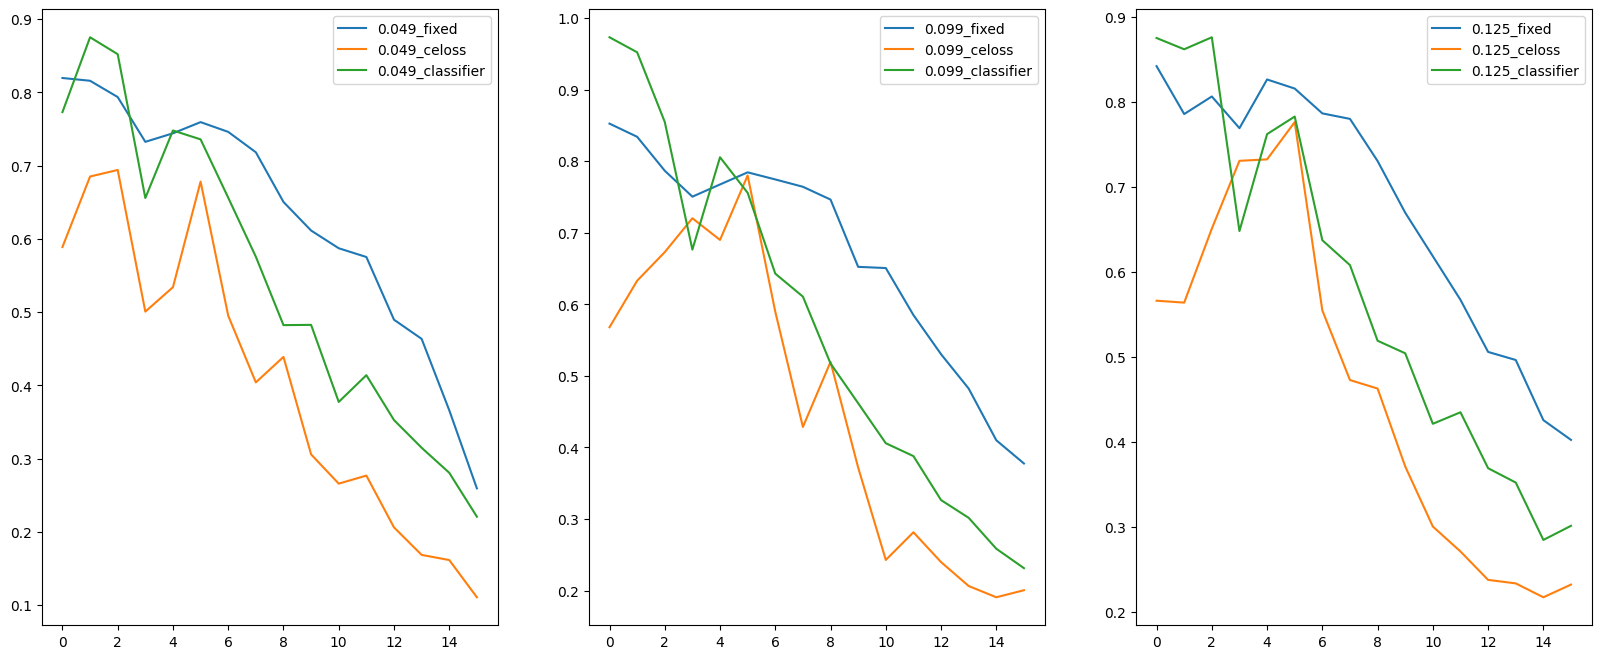

In [68]:
fig, ax = plt.subplots(1,3, figsize = (20,8))

for i in results_anomal.keys():
    if '0.049' in i:
        ax[0].plot(results_anomal[i], label = i)
        ax[0].legend()
    elif '0.099' in i:
        ax[1].plot(results_anomal[i], label = i)
        ax[1].legend()
    else:
        ax[2].plot(results_anomal[i], label = i)
        ax[2].legend()
# plt.legend()
plt.show()

In [ ]:
['fixed', 'classifier_xgb_20sample', 'classifier_xgb_50sample', 'classifier_xgb_100sample', 'classifier_xgb_200sample']

In [89]:
results_anomal = {}
results_total = {}
results_acc = {}
dataset = ['0.049_noise.csv','0.099_noise.csv', '0.125_noise.csv']
# dataset = ['0.099_noise.csv']

# threshold = ['fixed', 'celoss', 'classifier_rf_','classifier_logistic', 'classifier_xgb', 'classifier_lstm']
# threshold = ['fixed', 'classifier_rf_20sample', 'classifier_rf_50sample', 'classifier_rf_100sample', 'classifier_rf_200sample']
threshold = ['classifier_xgb_20sample', 'classifier_xgb_50sample', 'classifier_xgb_100sample', 'classifier_xgb_200sample']

for d in dataset:
    for thr in threshold:
        config = '%s_%s'%(d[:5], thr)
        results_anomal[config] = []
        results_total[config] = []
        results_acc[config] = []
        df = pd.read_csv('./%s_%s.csv'%(d, thr))
        if 'pred_ad_anom' in df.columns.values:
            df = df.rename(columns={'pred_ad_anom':'pred_noise'})
        prefixes = df.groupby('prefix')
        for p, group in prefixes:
            if p <35:
                y_true = group['true_noise']
                y_pred = group['pred_noise']
                cls_report = classification_report(y_true, y_pred, output_dict=True)
#                 print(classification_report(y_true, y_pred))
                results_anomal[config].append(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                results_total[config].append(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
                results_acc[config].append(classification_report(y_true, y_pred, output_dict=True)['accuracy'])
                # print(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                # print(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
        print('----------')

----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------


In [90]:
result_df = pd.DataFrame.from_dict(results_anomal).T
result_df['log'] = [i[:5] for i in result_df.index]
result_df['AD classifier'] = [i[6:] for i in result_df.index]
result_df = result_df.reset_index(drop=True)
groups = result_df.groupby(['log'])

# result_df.T.to_csv('./xgb_result_by_sample_size.csv', index=False)

result_df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,log,AD classifier
0,0.973545,0.971209,0.751252,0.573066,0.778169,0.609756,0.560748,0.534161,0.423983,0.420792,...,0.078125,0.120690,0.098765,0.000000,0.035088,0.041667,0.054054,0.114286,0.049,classifier_xgb_20sample
1,0.982517,0.977099,0.939024,0.637636,0.812274,0.727273,0.626752,0.553590,0.442535,0.431515,...,0.105263,0.133333,0.109589,0.032787,0.072727,0.090909,0.055556,0.121212,0.049,classifier_xgb_50sample
2,0.982517,0.977099,0.939024,0.644654,0.806452,0.776316,0.633205,0.590858,0.480094,0.456410,...,0.086331,0.128000,0.086957,0.052632,0.060606,0.071429,0.044444,0.095238,0.049,classifier_xgb_100sample
3,0.982517,0.977099,0.939024,0.653907,0.809353,0.812392,0.640420,0.602958,0.500608,0.469333,...,0.088235,0.130081,0.086957,0.054795,0.061538,0.071429,0.045455,0.095238,0.049,classifier_xgb_200sample
4,0.981991,0.954394,0.822749,0.586369,0.599162,0.524590,0.406236,0.321649,0.297288,0.258809,...,0.233333,0.160000,0.148148,0.129032,0.192308,0.102564,0.157895,0.166667,0.099,classifier_xgb_20sample
5,0.981991,0.961883,0.896982,0.661813,0.744755,0.698941,0.582707,0.514863,0.494091,0.467843,...,0.201183,0.156028,0.136752,0.195652,0.157895,0.065574,0.210526,0.050000,0.099,classifier_xgb_50sample
6,0.981991,0.964045,0.918803,0.689029,0.835317,0.791630,0.633978,0.596700,0.562379,0.502779,...,0.210526,0.171429,0.125000,0.204545,0.191781,0.000000,0.222222,0.105263,0.099,classifier_xgb_100sample
7,0.981991,0.964045,0.933768,0.711525,0.846614,0.815343,0.662824,0.626639,0.580297,0.522800,...,0.210526,0.172662,0.127273,0.204545,0.194444,0.000000,0.222222,0.105263,0.099,classifier_xgb_200sample
8,0.980121,0.971478,0.921606,0.679783,0.829604,0.815748,0.642857,0.626974,0.587809,0.565426,...,0.205128,0.163522,0.251852,0.103093,0.268041,0.140845,0.322581,0.173913,0.125,classifier_xgb_20sample
9,0.980121,0.965636,0.878981,0.572881,0.720896,0.652065,0.548082,0.480514,0.461256,0.438803,...,0.215686,0.169697,0.248175,0.100000,0.285714,0.140845,0.322581,0.173913,0.125,classifier_xgb_50sample


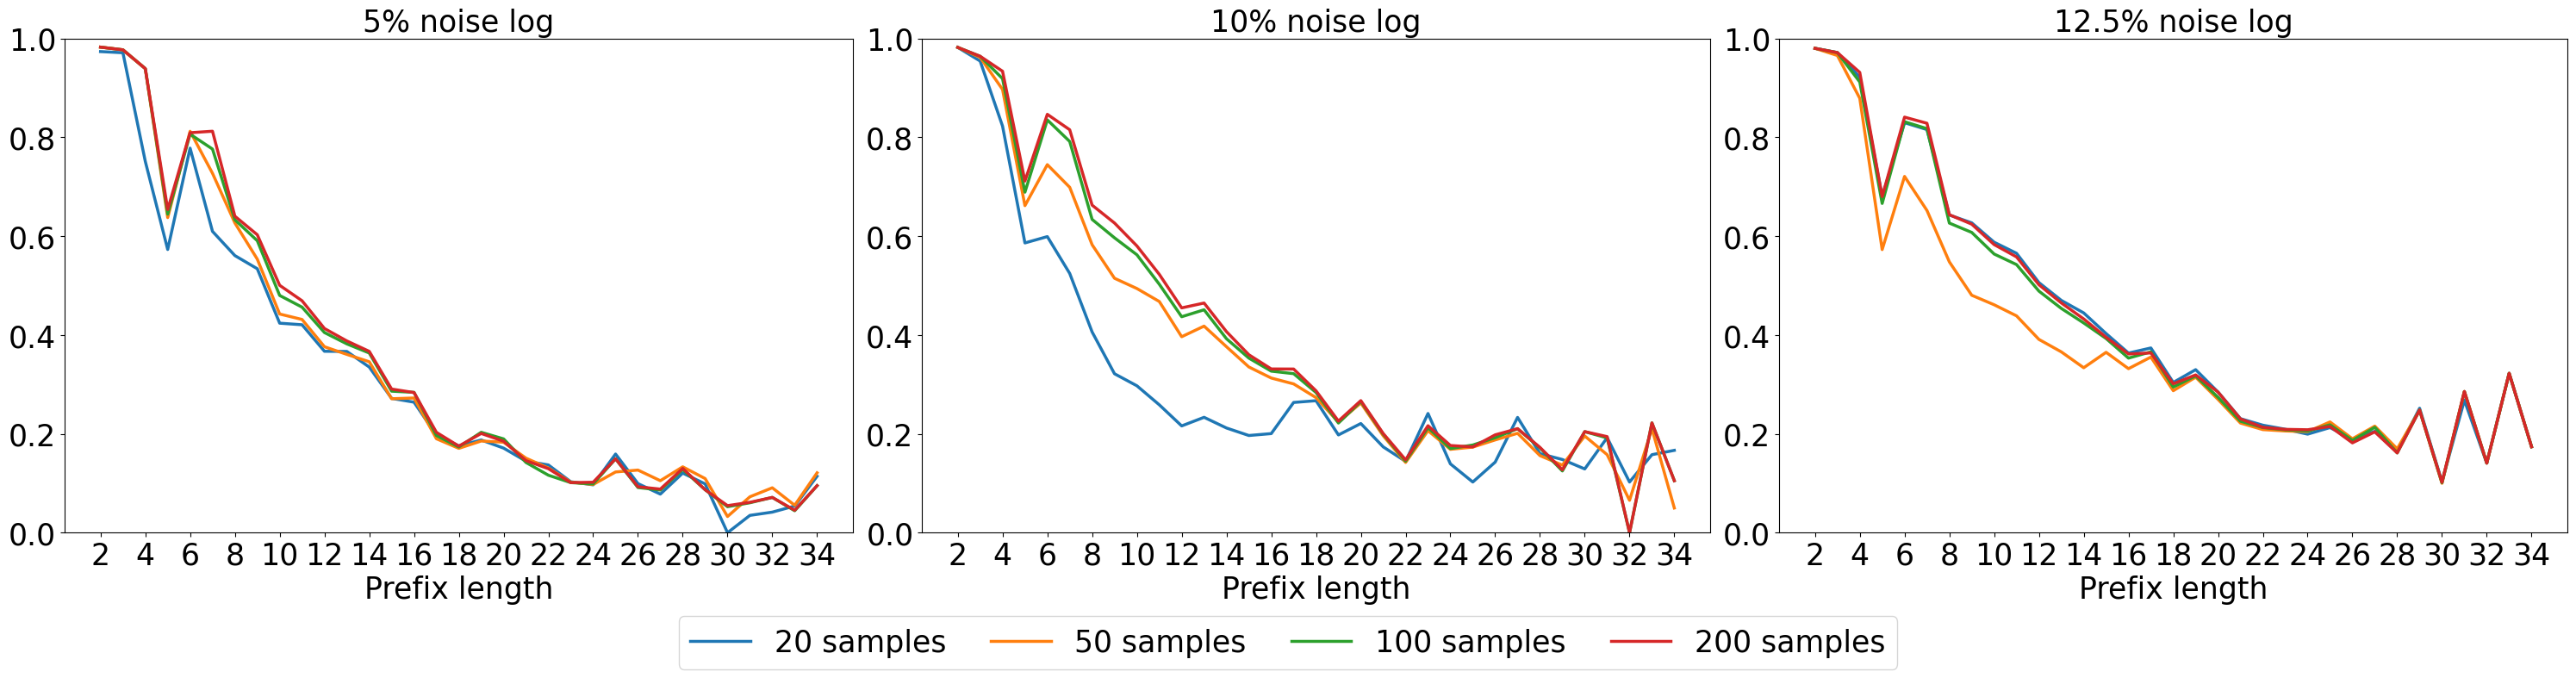

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
x_range = range(2, 35)
xticks   = range(2, 35, 2)

seen = set()  # track labels we've already used

def nice(lbl: str) -> str:
    # tweak as you like
    lbl = lbl.replace('classifier_xgb_', '').replace('classifier_xgb', 'xgb')
    lbl = lbl.replace('sample', ' samples')
    return lbl

for k in results_anomal.keys():
    if   '0.049' in k: a = ax[0]
    elif '0.099' in k: a = ax[1]
    else:              a = ax[2]

    raw_label = k[6:]
    plot_label = nice(raw_label) if raw_label not in seen else "_nolegend_"
    if plot_label != "_nolegend_":
        seen.add(raw_label)

    a.plot(x_range, results_anomal[k], label=plot_label, linewidth=2.5)
    if k[:5] == '0.049':
        k = '5%'
    elif k[:5] == '0.099':
        k = '10%'
    elif k[:5] == '0.125':
        k = '12.5%'
    a.set_title(f"{k[:5]} noise log", fontsize=25)
    a.set_ylim(0, 1)
    a.set_xticks(xticks)
    a.tick_params(axis='both', labelsize=25)
    a.set_xlabel('Prefix length', fontsize= 25)
    
# shared legend (multi-row if needed)
fig.legend(
    loc='lower center',
    ncol=4,                # adjust to fit; more cols => fewer rows
    fontsize=25,
    frameon=True,
    fancybox=True,  
    handlelength=2,
    handletextpad=0.8,
    columnspacing=1.5,
    bbox_to_anchor=(0.5, -0.)
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.22)  # leave room for the legend
# plt.show()
# plt.savefig('./result_xgb_anomalf1_by_sample_size.pdf', dpi=300)

In [82]:
results_anomal = {}
results_total = {}
results_acc = {}
dataset = ['0.049_noise.csv','0.099_noise.csv', '0.125_noise.csv']
# dataset = ['0.099_noise.csv']

# threshold = ['fixed', 'celoss', 'classifier_rf_','classifier_logistic', 'classifier_xgb', 'classifier_lstm']
threshold = ['classifier_rf_20sample', 'classifier_xgb_50_random_sample', 'classifier_logistic_20sample', 'classifier_lstm_20sample']
# threshold = ['classifier_xgb_20sample', 'classifier_xgb_50sample', 'classifier_xgb_100sample', 'classifier_xgb_200sample']




for d in dataset:
    for thr in threshold:
        config = '%s_%s'%(d[:5], thr)
        results_anomal[config] = []
        results_total[config] = []
        results_acc[config] = []
        df = pd.read_csv('./%s_%s.csv'%(d, thr))
        if 'pred_ad_anom' in df.columns.values:
            df = df.rename(columns={'pred_ad_anom':'pred_noise'})
        prefixes = df.groupby('prefix')
        for p, group in prefixes:
            if p <35:
                y_true = group['true_noise']
                y_pred = group['pred_noise']
                cls_report = classification_report(y_true, y_pred, output_dict=True)
                
#                 print(classification_report(y_true, y_pred))
                results_anomal[config].append(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                results_total[config].append(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
                results_acc[config].append(classification_report(y_true, y_pred, output_dict=True)['accuracy'])
                # print(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                # print(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
        print('----------')

----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------


In [83]:
for i in results_anomal.keys():
    print(i, len(results_anomal[i]))

0.049_classifier_rf_20sample 33
0.049_classifier_xgb_50_random_sample 33
0.049_classifier_logistic_20sample 33
0.049_classifier_lstm_20sample 33
0.099_classifier_rf_20sample 33
0.099_classifier_xgb_50_random_sample 33
0.099_classifier_logistic_20sample 33
0.099_classifier_lstm_20sample 33
0.125_classifier_rf_20sample 33
0.125_classifier_xgb_50_random_sample 33
0.125_classifier_logistic_20sample 33
0.125_classifier_lstm_20sample 33


In [84]:
result_df = pd.DataFrame.from_dict(results_anomal).T
result_df['log'] = [i[:5] for i in result_df.index]
result_df['AD classifier'] = [i[6:] for i in result_df.index]
result_df = result_df.reset_index(drop=True)
groups = result_df.groupby(['log'])

# result_df.T.to_csv('./result_by_classifier.csv', index=False)

result_df 

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,log,AD classifier
0,0.973545,0.955166,0.892178,0.678832,0.770751,0.737060,0.645161,0.593707,0.456328,0.457565,...,0.062500,0.068966,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.049,classifier_rf_20sample
1,0.980803,0.973384,0.582183,0.548862,0.768707,0.526786,0.542857,0.507605,0.363796,0.353755,...,0.082192,0.124031,0.083333,0.052632,0.060606,0.067797,0.044444,0.093023,0.049,classifier_xgb_50_random_sample
2,0.872340,0.846906,0.662953,0.366812,0.504425,0.330817,0.347232,0.320721,0.252902,0.217365,...,0.061728,0.131387,0.071429,0.051948,0.054795,0.064516,0.042553,0.088889,0.049,classifier_logistic_20sample
3,0.928926,0.911712,0.464646,0.580000,0.738769,0.685888,0.622739,0.561521,0.459930,0.448598,...,0.074074,0.120690,0.044944,0.057143,0.065574,0.040000,0.048780,0.102564,0.049,classifier_lstm_20sample
4,0.976168,0.880000,0.900000,0.631119,0.763359,0.748759,0.604845,0.589831,0.525235,0.469283,...,0.169014,0.046512,0.093023,0.181818,0.206897,0.000000,0.315789,0.000000,0.099,classifier_rf_20sample
5,0.981991,0.961883,0.866062,0.666214,0.798867,0.703988,0.612272,0.574333,0.528440,0.474263,...,0.211765,0.172662,0.136752,0.200000,0.186667,0.066667,0.210526,0.097561,0.099,classifier_xgb_50_random_sample
6,0.989494,0.846154,0.850394,0.599034,0.575269,0.516601,0.398477,0.319890,0.310863,0.266750,...,0.197674,0.183099,0.137931,0.173913,0.181818,0.063492,0.206897,0.095238,0.099,classifier_logistic_20sample
7,0.909253,0.873269,0.676824,0.659864,0.793621,0.698216,0.588925,0.547124,0.475924,0.408081,...,0.184971,0.165517,0.172414,0.200000,0.186667,0.033333,0.218182,0.100000,0.099,classifier_lstm_20sample
8,0.974805,0.794741,0.868472,0.655789,0.790216,0.777300,0.621451,0.602011,0.533430,0.485968,...,0.028986,0.233333,0.212766,0.214286,0.263158,0.000000,0.260870,0.181818,0.125,classifier_rf_20sample
9,0.980121,0.968966,0.901328,0.653247,0.806045,0.787234,0.586207,0.567996,0.526204,0.512208,...,0.178771,0.175676,0.250000,0.070588,0.321839,0.129032,0.301887,0.210526,0.125,classifier_xgb_50_random_sample


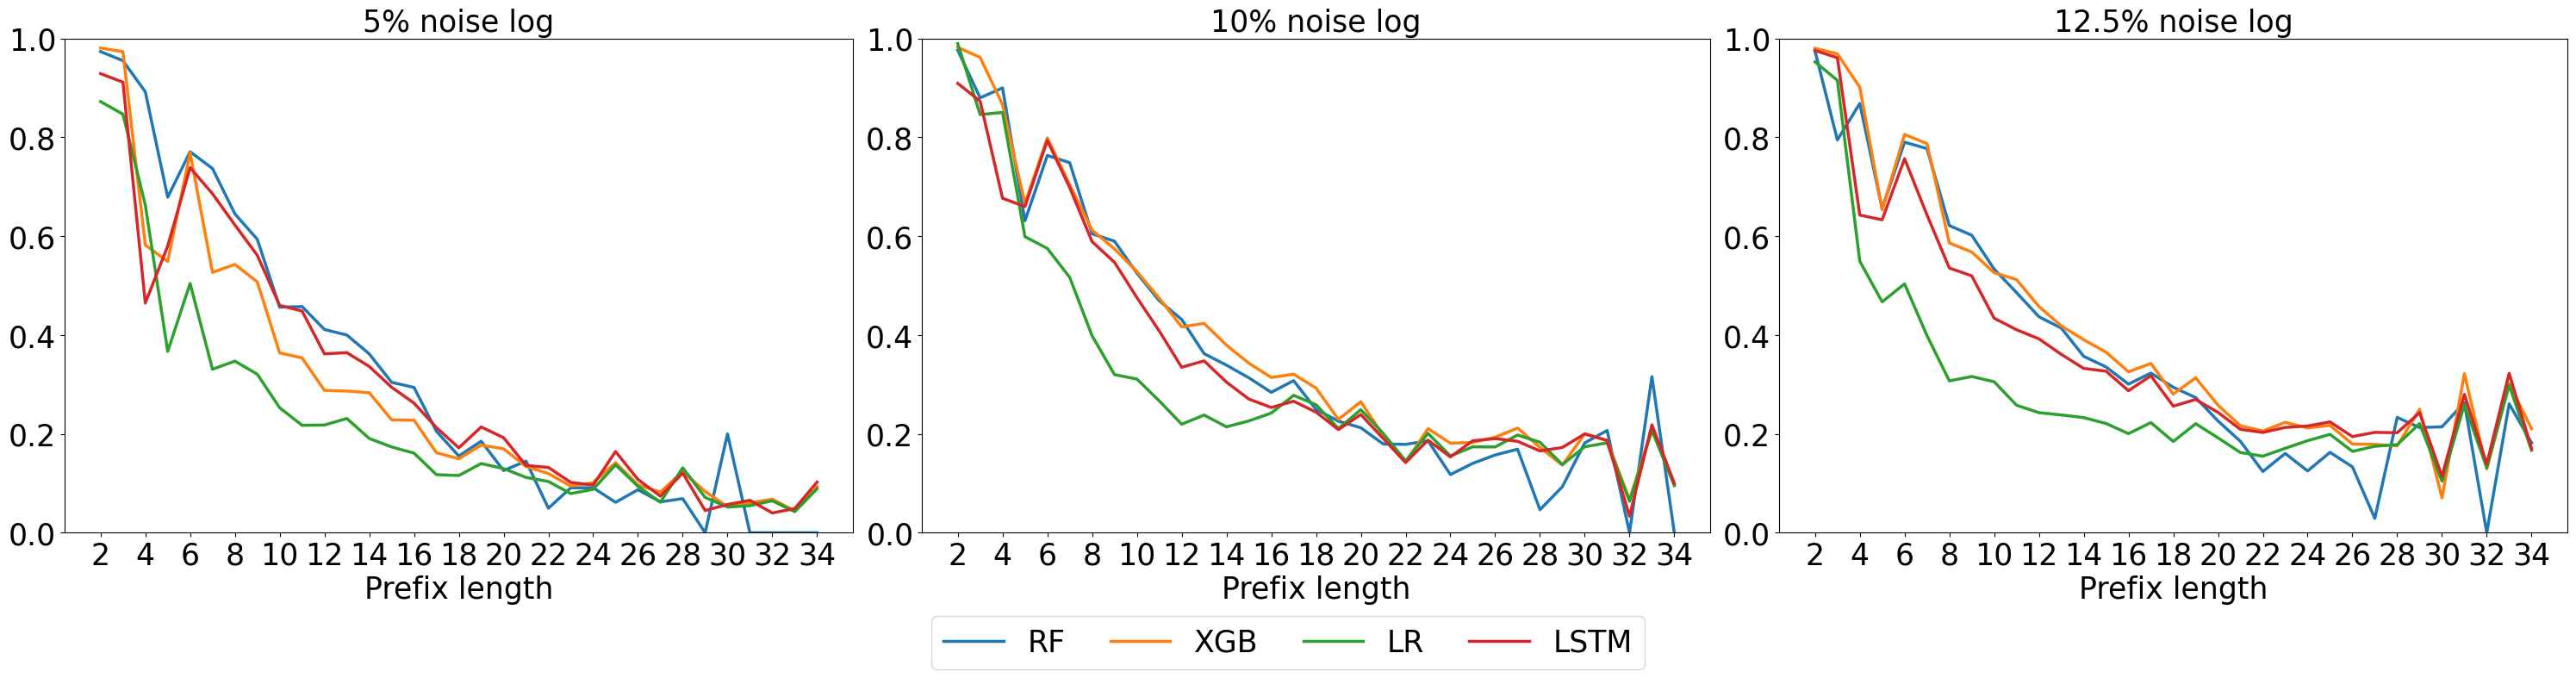

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
x_range = range(2, 35)
xticks   = range(2, 35, 2)

seen = set()  # track labels we've already used

def nice(lbl: str) -> str:
    # tweak as you like
    lbl = lbl.split('_')[1].upper()
    if lbl == 'LOGISTIC':
        lbl = 'LR'
    return lbl

for k in results_anomal.keys():
    if   '0.049' in k: a = ax[0]
    elif '0.099' in k: a = ax[1]
    else:              a = ax[2]

    raw_label = k[6:]
    plot_label = nice(raw_label) if raw_label not in seen else "_nolegend_"
    if plot_label != "_nolegend_":
        seen.add(raw_label)

    a.plot(x_range, results_anomal[k], label=plot_label, linewidth=2.5)
    if k[:5] == '0.049':
        k = '5%'
    elif k[:5] == '0.099':
        k = '10%'
    elif k[:5] == '0.125':
        k = '12.5%'
    a.set_title(f"{k[:5]} noise log", fontsize=25)
    a.set_ylim(0, 1)
    a.set_xticks(xticks)
    a.tick_params(axis='both', labelsize=25)
    a.set_xlabel('Prefix length', fontsize= 25)
    
# shared legend (multi-row if needed)
fig.legend(
    loc='lower center',
    ncol=4,                # adjust to fit; more cols => fewer rows
    fontsize=25,
    frameon=True,
    fancybox=True,  
    handlelength=2,
    handletextpad=0.8,
    columnspacing=1.5,
    bbox_to_anchor=(0.5, -0.)
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.22)  # leave room for the legend
# plt.show()
# plt.savefig('./result_anomalf1_by_classifier.pdf', dpi=300)

In [3]:
results_anomal = {}
results_total = {}
results_acc = {}
dataset = ['0.049_noise.csv','0.099_noise.csv', '0.125_noise.csv']
# dataset = ['0.099_noise.csv']

# threshold = ['fixed', 'celoss', 'classifier_rf_','classifier_logistic', 'classifier_xgb', 'classifier_lstm']
threshold = ['fixed', 'classifier_xgb_50sample']
# threshold = ['classifier_xgb_50sample', 'classifier_xgb_50_random_sample_napv2']

# threshold = ['classifier_xgb_20sample', 'classifier_xgb_50sample', 'classifier_xgb_100sample', 'classifier_xgb_200sample']




for d in dataset:
    for thr in threshold:
        config = '%s_%s'%(d[:5], thr)
        results_anomal[config] = []
        results_total[config] = []
        results_acc[config] = []
        df = pd.read_csv('./%s_%s.csv'%(d, thr))
        if 'pred_ad_anom' in df.columns.values:
            df = df.rename(columns={'pred_ad_anom':'pred_noise'})
        prefixes = df.groupby('prefix')
        for p, group in prefixes:
            if p <35:
                y_true = group['true_noise']
                y_pred = group['pred_noise']
                cls_report = classification_report(y_true, y_pred, output_dict=True)
                
#                 print(classification_report(y_true, y_pred))
                results_anomal[config].append(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                results_total[config].append(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
                results_acc[config].append(classification_report(y_true, y_pred, output_dict=True)['accuracy'])
                # print(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                # print(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
        print('----------')

----------
----------
----------
----------
----------
----------


In [4]:
result_df = pd.DataFrame.from_dict(results_anomal).T
result_df['log'] = [i[:5] for i in result_df.index]
result_df['AD classifier'] = [i[6:] for i in result_df.index]
result_df = result_df.reset_index(drop=True)
groups = result_df.groupby(['log'])

# result_df.T.to_csv('./result_STAND_filtered.csv', index=False)

# result_df 

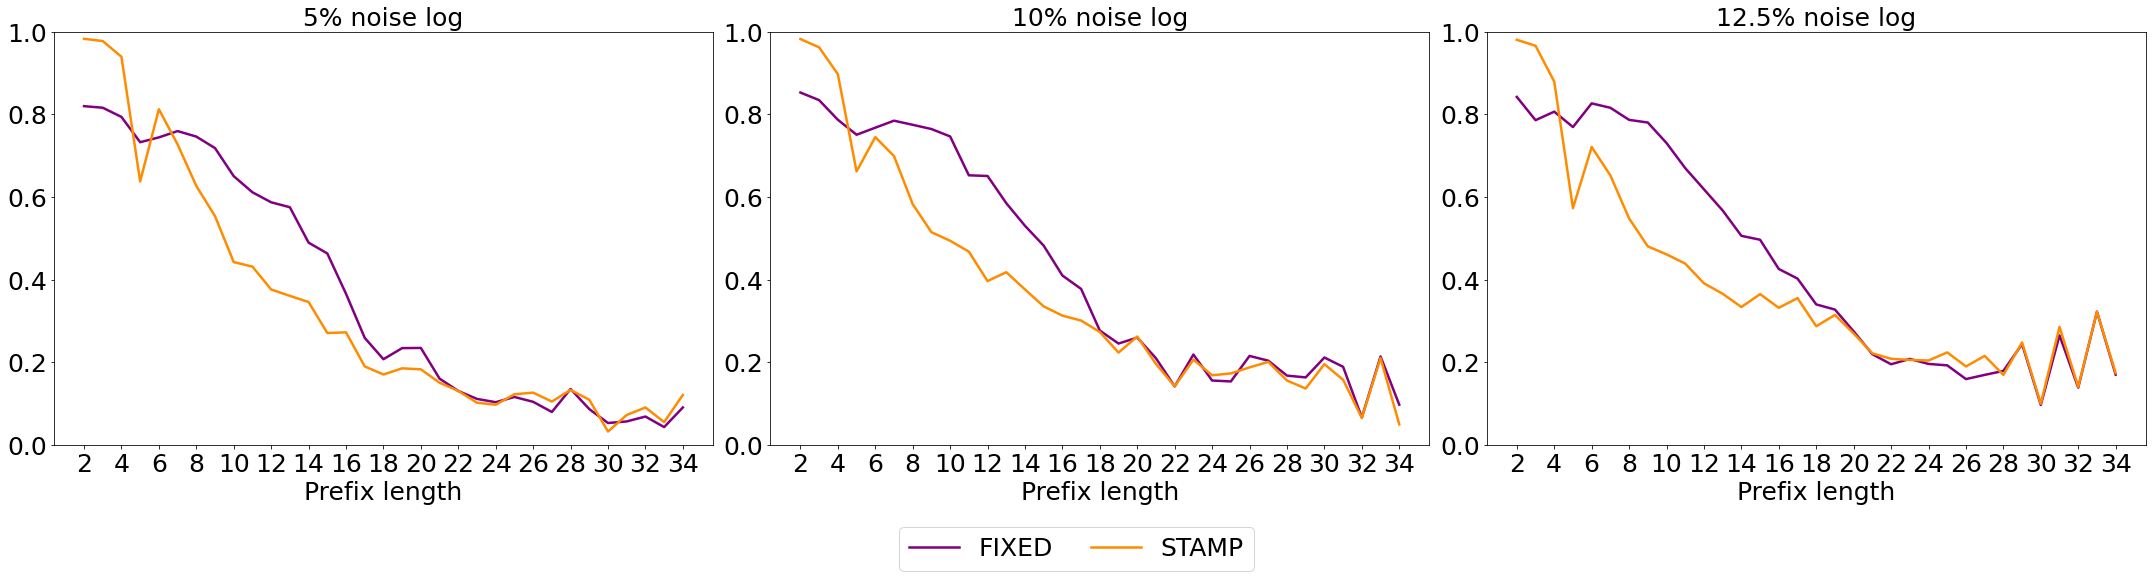

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
x_range = range(2, 35)
xticks  = range(2, 35, 2)

seen = set()  # track labels we've already used

# color mapping
color_map = {
    "FIXED": "purple",
    "RF": "royalblue",
    "STAMP": "darkorange",
}

def nice(lbl: str) -> str:
    lbl = lbl.upper()

    if 'V2' in lbl:
        lbl = 'STAND V2'
        return lbl
    if lbl != 'FIXED':
        lbl = lbl.split('_')[1]  # keep only classifier part
    if lbl == 'XGB':
        lbl = 'STAMP'
    return lbl

for k in results_anomal.keys():
    if   '0.049' in k: 
        a = ax[0]
    elif '0.099' in k: 
        a = ax[1]
    else:              
        a = ax[2]

    raw_label  = k[6:]
    plot_label = nice(raw_label)

    # decide color based on classifier
    color = color_map.get(plot_label, "gray")  # fallback to gray if unexpected

    # avoid duplicate legends
    if raw_label in seen:
        legend_label = "_nolegend_"
    else:
        legend_label = plot_label
        seen.add(raw_label)

    a.plot(
        x_range,
        results_anomal[k],
        label=legend_label,
        color=color,
        linewidth=2.5
    )

    # title
    if k[:5] == '0.049':
        noise = '5%'
    elif k[:5] == '0.099':
        noise = '10%'
    elif k[:5] == '0.125':
        noise = '12.5%'
    else:
        noise = k[:5]
    a.set_title(f"{noise} noise log", fontsize=25)

    a.set_ylim(0, 1)
    a.set_xticks(xticks)
    a.tick_params(axis='both', labelsize=25)
    a.set_xlabel('Prefix length', fontsize=25)

# shared legend
fig.legend(
    loc='lower center',
    ncol=4,
    fontsize=25,
    frameon=True,
    fancybox=True,
    handlelength=2,
    handletextpad=0.8,
    columnspacing=1.5,
    bbox_to_anchor=(0.5, -0.02)
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.22)
# plt.show()
plt.savefig('./result_anomalf1_fixed_proposed.pdf', dpi=300)

In [103]:
results_anomal = {}
results_total = {}
results_acc = {}
dataset = ['0.049_noise.csv','0.099_noise.csv', '0.125_noise.csv']
# dataset = ['0.099_noise.csv']

# threshold = ['fixed', 'celoss', 'classifier_rf_','classifier_logistic', 'classifier_xgb', 'classifier_lstm']
# threshold = ['fixed', 'classifier_rf_20sample', 'classifier_rf_50sample', 'classifier_rf_100sample', 'classifier_rf_200sample']
threshold = ['classifier_xgb_50sample', 'classifier_xgb_50_random_sample_napv2']
# threshold = ['classifier_xgb_50_random_sample', 'classifier_xgb_50_random_sample_napv2']

for d in dataset:
    for thr in threshold:
        config = '%s_%s'%(d[:5], thr)
        results_anomal[config] = []
        results_total[config] = []
        results_acc[config] = []
        df = pd.read_csv('./%s_%s.csv'%(d, thr))
        if 'pred_ad_anom' in df.columns.values:
            df = df.rename(columns={'pred_ad_anom':'pred_noise'})
        prefixes = df.groupby('prefix')
        for p, group in prefixes:
            if p <35:
                y_true = group['true_noise']
                y_pred = group['pred_noise']
                cls_report = classification_report(y_true, y_pred, output_dict=True)
#                 print(classification_report(y_true, y_pred))
                results_anomal[config].append(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                results_total[config].append(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
                results_acc[config].append(classification_report(y_true, y_pred, output_dict=True)['accuracy'])
                # print(classification_report(y_true, y_pred, output_dict=True)['1']['f1-score'])
                # print(classification_report(y_true, y_pred, output_dict=True)['macro avg']['f1-score'])
        print('----------')

----------
----------
----------
----------
----------
----------


In [104]:
result_df = pd.DataFrame.from_dict(results_anomal).T
result_df['log'] = [i[:5] for i in result_df.index]
result_df['AD classifier'] = [i[6:] for i in result_df.index]
result_df = result_df.reset_index(drop=True)
groups = result_df.groupby(['log'])

# result_df.T.to_csv('./result_STAND_filtered.csv', index=False)

# result_df 

# result_df = pd.DataFrame.from_dict(results_anomal).T
# result_df['log'] = [i[:5] for i in result_df.index]
# result_df['AD classifier'] = [i[6:] for i in result_df.index]
# result_df = result_df.reset_index(drop=True)
# groups = result_df.groupby(['log'])

# col_rename_dict = dict()
# for i in result_df.columns.values:
#     try:
#         col_rename_dict[i] = int(i)+2
#     except:
#         col_rename_dict[i] = i

# result_df = result_df.rename(columns= col_rename_dict)
# for i in list(result_df[13]):
#     print(f"{round(i,2)}")

# result_df.T.to_csv('./result_weird.csv', index=False)

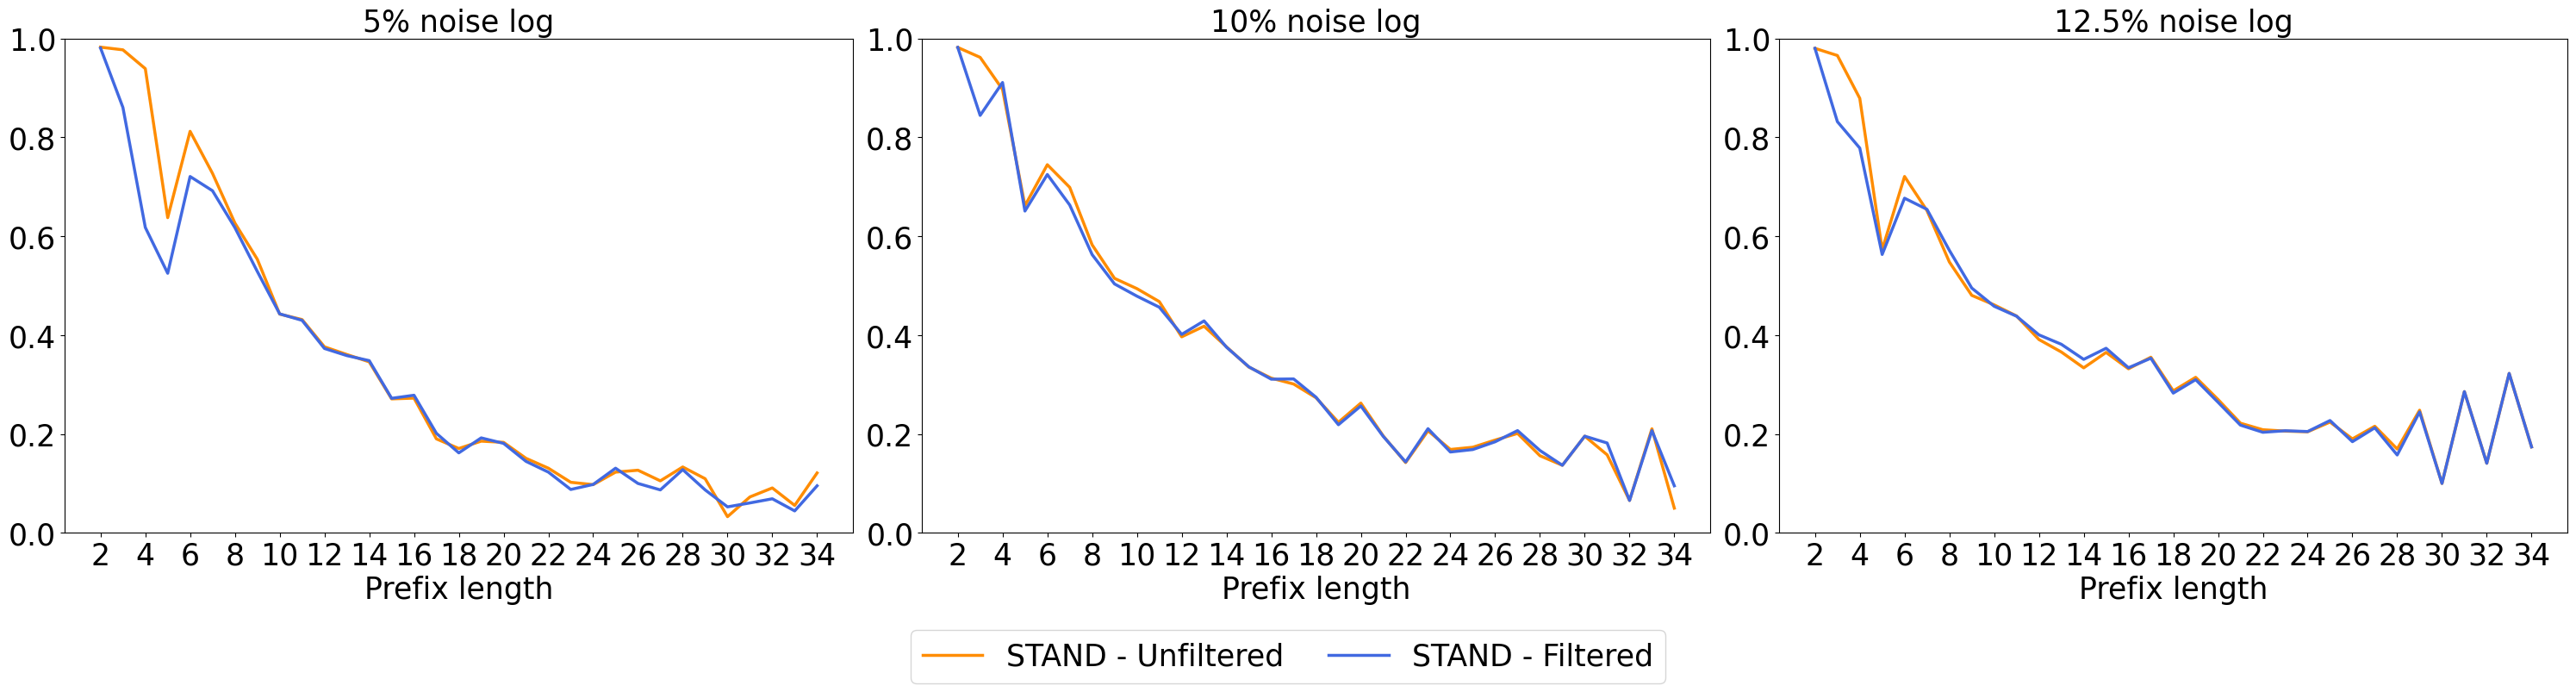

In [111]:
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
x_range = range(2, 35)
xticks  = range(2, 35, 2)

seen = set()  # track labels we've already used

# color mapping
color_map = {
    "FIXED": "purple",
    "STAND - Filtered": "royalblue",
    "STAND - Unfiltered": "darkorange",
}

def nice(lbl: str) -> str:
    lbl = lbl.upper()

    if 'V2' in lbl:
        lbl = 'STAND - Filtered'
    else:
        lbl = 'STAND - Unfiltered'
    return lbl

for k in results_anomal.keys():
    if   '0.049' in k: 
        a = ax[0]
    elif '0.099' in k: 
        a = ax[1]
    else:              
        a = ax[2]

    raw_label  = k[6:]
    plot_label = nice(raw_label)

    # decide color based on classifier
    color = color_map.get(plot_label, "gray")  # fallback to gray if unexpected

    # avoid duplicate legends
    if raw_label in seen:
        legend_label = "_nolegend_"
    else:
        legend_label = plot_label
        seen.add(raw_label)

    a.plot(
        x_range,
        results_anomal[k],
        label=legend_label,
        color=color,
        linewidth=2.5
    )

    # title
    if k[:5] == '0.049':
        noise = '5%'
    elif k[:5] == '0.099':
        noise = '10%'
    elif k[:5] == '0.125':
        noise = '12.5%'
    else:
        noise = k[:5]
    a.set_title(f"{noise} noise log", fontsize=25)

    a.set_ylim(0, 1)
    a.set_xticks(xticks)
    a.tick_params(axis='both', labelsize=25)
    a.set_xlabel('Prefix length', fontsize=25)

# shared legend
fig.legend(
    loc='lower center',
    ncol=4,
    fontsize=25,
    frameon=True,
    fancybox=True,
    handlelength=2,
    handletextpad=0.8,
    columnspacing=1.5,
    bbox_to_anchor=(0.5, -0.02)
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.22)
# plt.show()
# plt.savefig('./result_anomalf1_fixed_proposed.pdf', dpi=300)
plt.savefig('./result_xgb_anomalf1_filterSTAND.pdf', dpi=300)

0.099_fixed
[0.8525641025641025, 0.8341708542713567, 0.7867403314917127, 0.7504835589941973, 0.7675438596491229, 0.7844739530132788, 0.774555659494855, 0.7643064985451018, 0.7464212678936605, 0.6523955147808359, 0.650730411686587, 0.5850340136054422, 0.5303244005641748, 0.48226950354609927, 0.4100418410041841, 0.3775933609958506, 0.27684964200477324, 0.24552429667519182, 0.259946949602122, 0.20987654320987653, 0.1417910447761194, 0.21897810218978103, 0.15609756097560976, 0.15384615384615385, 0.2155688622754491, 0.20408163265306123, 0.16793893129770993, 0.16363636363636364, 0.21176470588235294, 0.1891891891891892, 0.06666666666666667, 0.21428571428571427, 0.0975609756097561]
0.099_classifier_xgb_20sample
[0.9819905213270143, 0.9543937708565072, 0.8227488151658767, 0.5863689776733255, 0.5991620111731844, 0.5245901639344263, 0.40623646600259855, 0.3216494845360825, 0.2972882490793438, 0.25880923450789795, 0.21611129084438693, 0.23352680095595765, 0.21189591078066913, 0.19670672007120604, 

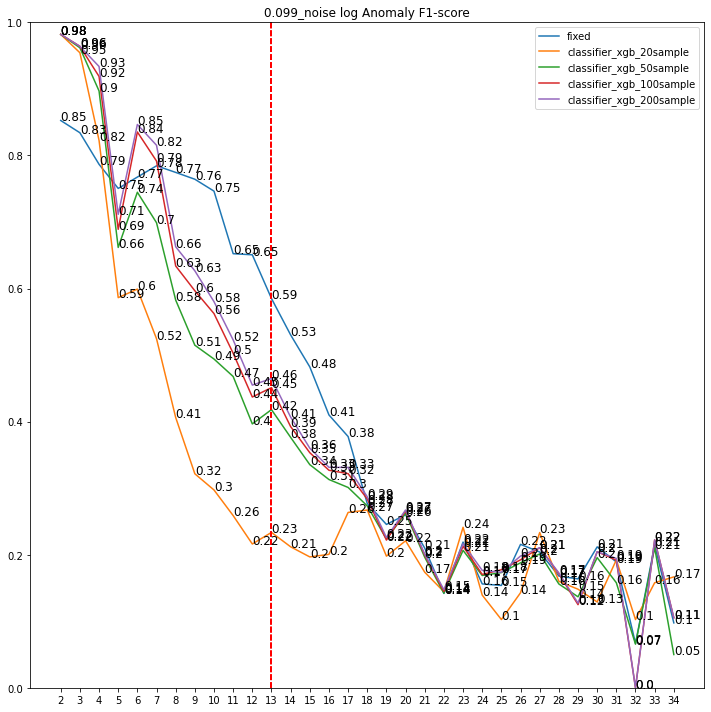

In [19]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
x_range = range(2,35)
for i in results_anomal.keys():
    if '0.099' in i:
        print(i)
        print(results_anomal[i])
        ax.plot(x_range, results_anomal[i], label = i[6:])
        ax.legend()
        ax.set_title('%s_noise log Anomaly F1-score'%(i[:5]))
        ax.set_ylim(0,1)
        ax.set_xticks(x_range)
        ax.axvline(13, linestyle='--', color='red')
        
        for x, y in zip(x_range, results_anomal[i]):
            ax.text(x, y, f"{round(y,2)}", fontsize=12)
# plt.legend()
# plt.show()
plt.tight_layout()
# plt.savefig('./result_0.99_noise_anomalf1.png', dpi=300)
# plt.savefig('./result_xgb_anomalf1.png', dpi=300)